In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [3]:
matches_df=pd.read_csv("Data/matches.csv" , parse_dates=["date"], dayfirst=True)
score_df=pd.read_csv("Data/deliveries.csv")

In [4]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [5]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               577 non-null    int64         
 1   season           577 non-null    int64         
 2   city             570 non-null    object        
 3   date             577 non-null    datetime64[ns]
 4   team1            577 non-null    object        
 5   team2            577 non-null    object        
 6   toss_winner      577 non-null    object        
 7   toss_decision    577 non-null    object        
 8   result           577 non-null    object        
 9   dl_applied       577 non-null    int64         
 10  winner           574 non-null    object        
 11  win_by_runs      577 non-null    int64         
 12  win_by_wickets   577 non-null    int64         
 13  player_of_match  574 non-null    object        
 14  venue            577 non-null    object   

In [6]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          136598 non-null  int64 
 1   inning            136598 non-null  int64 
 2   batting_team      136598 non-null  object
 3   bowling_team      136598 non-null  object
 4   over              136598 non-null  int64 
 5   ball              136598 non-null  int64 
 6   batsman           136598 non-null  object
 7   non_striker       136598 non-null  object
 8   bowler            136598 non-null  object
 9   is_super_over     136598 non-null  int64 
 10  wide_runs         136598 non-null  int64 
 11  bye_runs          136598 non-null  int64 
 12  legbye_runs       136598 non-null  int64 
 13  noball_runs       136598 non-null  int64 
 14  penalty_runs      136598 non-null  int64 
 15  batsman_runs      136598 non-null  int64 
 16  extra_runs        136598 non-null  int

In [7]:
score_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000
mean,288.564679,1.482738,10.144585,3.617125,0.000498,0.037782,0.004978,0.022372,0.004480,0.000073,1.215311,0.069686,1.284997
std,165.929865,0.501575,5.673901,1.808200,0.022306,0.260535,0.115512,0.201309,0.074062,0.019132,1.589654,0.353357,1.579014
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,289.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,432.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,577.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [8]:
matches_df.describe(include="all")

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,577.000000,577.000000,570,577,577,577,577,577,577,577.000000,574,577.000000,577.000000,574,577,577,577,0.0
unique,NaN,NaN,30,407,13,13,13,2,3,NaN,13,NaN,NaN,187,35,43,45,NaN
top,NaN,NaN,Mumbai,2011-04-17 00:00:00,Chennai Super Kings,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,NaN
freq,NaN,NaN,77,2,77,77,74,315,568,NaN,80,NaN,NaN,17,58,73,54,NaN
first,NaN,NaN,NaN,2008-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-05-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,289.000000,2012.029463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025997,NaN,13.715771,3.363951,NaN,NaN,NaN,NaN,NaN
std,166.709828,2.486247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.159263,NaN,23.619282,3.416049,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,145.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [10]:
score_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    129871
dismissal_kind      129871
fielder             131727
dtype: int64

In [11]:
matches_df["id"].max()

577

In [12]:
matches_df["season"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [13]:
matches_df["season"].nunique()

9

In [14]:
matches_df["season"].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2015    59
2008    58
2009    57
Name: season, dtype: int64

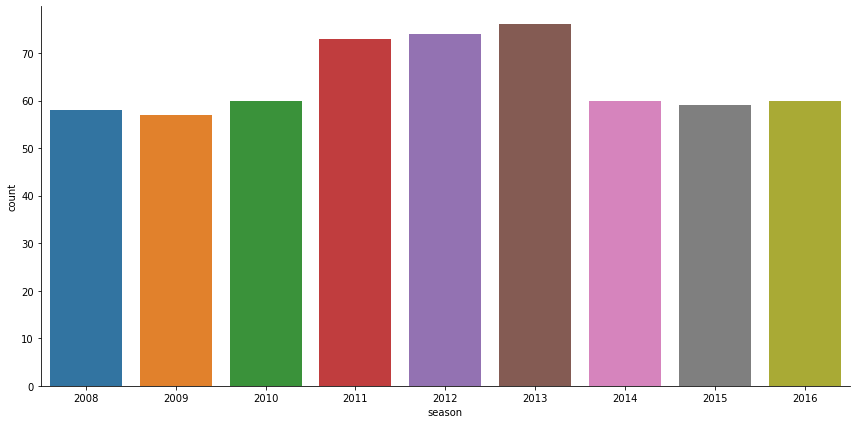

In [15]:

sns.catplot(x="season" ,data= matches_df , kind="count" , height=6, aspect=2)
plt.show()

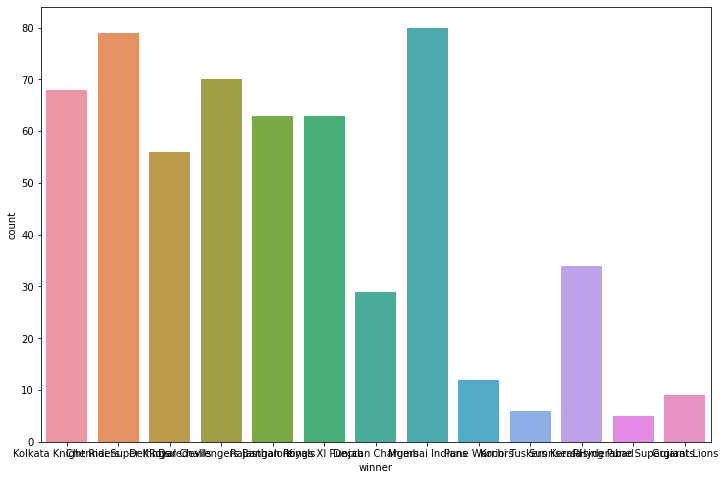

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x="winner", data=matches_df)
plt.show()

In [17]:
matches_df["winner"].value_counts().head(10)  # Mumbai INdians has won most num of matches # VALUE_COUNTS**

Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings XI Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Name: winner, dtype: int64

In [18]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [19]:
#req_col=["match_id","inning" ,"ball"]
#score_df

In [20]:
ball_score_df=score_df.groupby( ["match_id","inning"])["ball"].count().reset_index()

In [21]:
ball_score_df

,match_id,inning,ball
0,1,1,124
1,1,2,101
2,2,1,124
3,2,2,124
4,3,1,122
...,...,...,...
1159,575,2,120
1160,576,1,125
1161,576,2,117
1162,577,1,126


In [22]:
type(ball_score_df
    )

pandas.core.frame.DataFrame

In [23]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [24]:
req_col=["id","season"]

season_df=matches_df[req_col]

In [25]:
season_df

,id,season
0,1,2008
1,2,2008
2,3,2008
3,4,2008
4,5,2008
...,...,...
572,573,2016
573,574,2016
574,575,2016
575,576,2016


In [26]:
matches_df[["id","season"]]   # selecting columns

,id,season
0,1,2008
1,2,2008
2,3,2008
3,4,2008
4,5,2008
...,...,...
572,573,2016
573,574,2016
574,575,2016
575,576,2016


In [27]:
ball_season_df=pd.merge(ball_score_df ,season_df ,how="inner",left_on= "match_id" , right_on="id")

In [28]:
ball_season_df

,match_id,inning,ball,id,season
0,1,1,124,1,2008
1,1,2,101,1,2008
2,2,1,124,2,2008
3,2,2,124,2,2008
4,3,1,122,3,2008
...,...,...,...,...,...
1159,575,2,120,575,2016
1160,576,1,125,576,2016
1161,576,2,117,576,2016
1162,577,1,126,577,2016


In [29]:
ball_season_df1=ball_season_df.groupby(["season", "inning"])["ball"].sum().reset_index()

In [30]:
ball_season_df1

,season,inning,ball
0,2008,1,7065
1,2008,2,6424
2,2009,1,7021
3,2009,2,6574
4,2009,3,7
5,2009,4,4
6,2010,1,7491
7,2010,2,6998
8,2010,3,5
9,2010,4,4


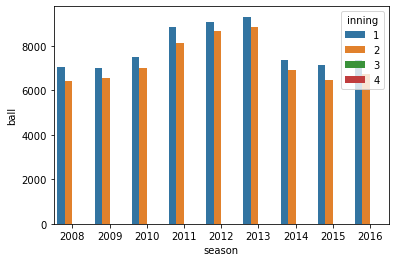

In [31]:
sns.barplot("season","ball" , data=ball_season_df1 ,hue="inning")
plt.show()

In [32]:
#ball_season_df1[ball_season_df1["inning"]<=2]  # filterout


ball_season_df1[ball_season_df1["inning"].isin([1,2])]

,season,inning,ball
0,2008,1,7065
1,2008,2,6424
2,2009,1,7021
3,2009,2,6574
6,2010,1,7491
7,2010,2,6998
10,2011,1,8863
11,2011,2,8150
12,2012,1,9096
13,2012,2,8671


In [33]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [59]:
city_list=["Bangalore" ,"Delhi"]
matches_df[matches_df["city"].isin(city_list)
]
#matches_df["city"].isin(["Bangalore" ,"Delhi","Mumbai"]).count()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
10,11,2008,Bangalore,2008-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN
14,15,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
16,17,2008,Delhi,2008-04-30,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Daredevils,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,567,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
573,574,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [60]:
matches_df[(matches_df["city"] =="Bangalore") | (matches_df["city"] =="Delhi") | (matches_df["city"] =="Mumbai" )]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
10,11,2008,Bangalore,2008-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN
12,13,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,567,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
573,574,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [61]:
season_df1=season_df.copy(deep=True)

In [62]:
season_df1.rename(columns={"id" :"match_id" }, inplace=True)

In [63]:
season_df1

,match_id,season
0,1,2008
1,2,2008
2,3,2008
3,4,2008
4,5,2008
...,...,...
572,573,2016
573,574,2016
574,575,2016
575,576,2016


In [64]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [65]:
ball_season_df

,match_id,inning,ball,id,season
0,1,1,124,1,2008
1,1,2,101,1,2008
2,2,1,124,2,2008
3,2,2,124,2,2008
4,3,1,122,3,2008
...,...,...,...,...,...
1159,575,2,120,575,2016
1160,576,1,125,576,2016
1161,576,2,117,576,2016
1162,577,1,126,577,2016


In [66]:
total_runs=score_df[["total_runs"]]

In [67]:
total_runs

,total_runs
0,1
1,0
2,1
3,0
4,0
...,...
136593,2
136594,0
136595,1
136596,1


In [112]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [113]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [114]:
run_per_season=score_df.groupby(["match_id","inning","batting_team"])["total_runs"].sum().reset_index().sort_values(by="total_runs", ascending=False).head(5)

In [115]:
run_per_season

,match_id,inning,batting_team,total_runs
709,352,1,Royal Challengers Bangalore,263
1130,561,1,Royal Challengers Bangalore,248
296,147,1,Chennai Super Kings,246
2,2,1,Chennai Super Kings,240
1014,503,1,Royal Challengers Bangalore,235


In [116]:
run_batsman=score_df.groupby(["match_id","inning","batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs", ascending=False).head(5)

In [117]:
run_batsman

,match_id,inning,batsman,batsman_runs
5315,352,1,CH Gayle,175
0,1,1,BB McCullum,158
7556,503,1,AB de Villiers,133
8387,561,1,AB de Villiers,129
4694,313,1,CH Gayle,128


In [118]:
season_df.head()

,id,season
0,1,2008
1,2,2008
2,3,2008
3,4,2008
4,5,2008


In [119]:
team_season_df=pd.merge(season_df,run_per_season , how="inner" ,left_on="id", right_on="match_id" )

In [120]:
team_season_df

,id,season,match_id,inning,batting_team,total_runs
0,2,2008,2,1,Chennai Super Kings,240
1,147,2010,147,1,Chennai Super Kings,246
2,352,2013,352,1,Royal Challengers Bangalore,263
3,503,2015,503,1,Royal Challengers Bangalore,235
4,561,2016,561,1,Royal Challengers Bangalore,248


In [121]:
team_season_df.groupby(["season"  ,"batting_team"])["total_runs"].sum().reset_index()

,season,batting_team,total_runs
0,2008,Chennai Super Kings,240
1,2010,Chennai Super Kings,246
2,2013,Royal Challengers Bangalore,263
3,2015,Royal Challengers Bangalore,235
4,2016,Royal Challengers Bangalore,248


In [122]:
team_season_df.groupby(["season" ,"inning" ,"batting_team"])["total_runs"].sum().reset_index()

,season,inning,batting_team,total_runs
0,2008,1,Chennai Super Kings,240
1,2010,1,Chennai Super Kings,246
2,2013,1,Royal Challengers Bangalore,263
3,2015,1,Royal Challengers Bangalore,235
4,2016,1,Royal Challengers Bangalore,248


In [123]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [124]:
batsman_batsman_runs=score_df.groupby(["batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs",ascending= False).head()

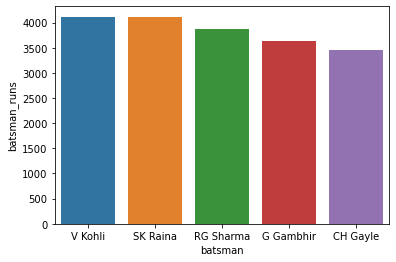

In [125]:
#batsman_batsman_runs

sns.barplot("batsman", "batsman_runs" , data=batsman_batsman_runs)
plt.show()

In [126]:
score_df["batsman_runs"].unique()

array([0, 4, 6, 1, 2, 5, 3], dtype=int64)

In [127]:

req_col=["match_id","batsman","batsman_runs"]
batsman_runs_high=score_df[score_df["batsman_runs"].isin([4,6])][req_col].reset_index( drop=True)

In [128]:
batsman_runs_high

,match_id,batsman,batsman_runs
0,1,BB McCullum,4
1,1,BB McCullum,4
2,1,BB McCullum,6
3,1,BB McCullum,4
4,1,BB McCullum,4
...,...,...,...
21233,577,SR Watson,6
21234,577,STR Binny,6
21235,577,Sachin Baby,4
21236,577,Sachin Baby,6


In [131]:
batsman_runs_high.groupby(["batsman"])["batsman_runs"]

In [132]:
batsman_runs_high["Count"]=batsman_runs_high["batsman_runs"]

In [133]:
batsman_runs_high=batsman_runs_high.groupby(["batsman" ,"batsman_runs"])["Count"].count().reset_index()

In [134]:
batsman_runs_high

,batsman,batsman_runs,Count
0,A Ashish Reddy,4,16
1,A Ashish Reddy,6,15
2,A Chopra,4,7
3,A Flintoff,4,5
4,A Flintoff,6,2
...,...,...,...
624,Yashpal Singh,4,5
625,Yuvraj Singh,4,175
626,Yuvraj Singh,6,133
627,Z Khan,4,11


In [135]:
batsman_runs_high[batsman_runs_high["batsman_runs"]==4].sort_values(by="Count", ascending=False).head(5)

,batsman,batsman_runs,Count
181,G Gambhir,4,422
594,V Kohli,4,361
515,SK Raina,4,360
485,S Dhawan,4,348
477,RV Uthappa,4,341


In [136]:
batsman_runs_high[batsman_runs_high["batsman_runs"]==6].sort_values(by="Count", ascending=False).head(5)

,batsman,batsman_runs,Count
113,CH Gayle,6,252
449,RG Sharma,6,164
516,SK Raina,6,161
595,V Kohli,6,149
621,YK Pathan,6,143


In [137]:
# WHo has taken highest & Lowest wicket
score_df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [138]:
req_col=["match_id","bowler","dismissal_kind"]

score_df["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [139]:
bowler_df=score_df[req_col]

In [140]:
out_category= ['caught', 'bowled', 'lbw',
       'stumped', 'caught and bowled', 'hit wicket']

In [141]:
bowler_df1=bowler_df[bowler_df["dismissal_kind"].isin(out_category)]

In [142]:
bowler_df.groupby(["bowler"])["dismissal_kind"].count().reset_index().sort_values(by="dismissal_kind" , ascending=False)

,bowler,dismissal_kind
276,SL Malinga,159
80,DJ Bravo,137
4,A Mishra,132
109,Harbhajan Singh,128
214,PP Chawla,127
...,...,...
303,Swapnil Singh,0
172,M Vijay,0
246,RW Price,0
144,KAJ Roach,0


In [143]:
umpire1_df=matches_df[["season","umpire1"]]

In [144]:
umpire2_df=matches_df[["season","umpire2"]]

In [145]:
umpire1_df.rename(columns={"umpire1" : "umpire" } , inplace=True)
umpire2_df.rename(columns={"umpire2" : "umpire" } , inplace=True)

In [146]:
umpire_df =umpire1_df.append(umpire2_df)

In [147]:
umpire_df["umpire"].value_counts().head(5)

HDPK Dharmasena    87
S Ravi             72
SJA Taufel         55
Asad Rauf          51
M Erasmus          48
Name: umpire, dtype: int64

In [148]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [149]:
reg_col=["toss_winner" ,"toss_decision" ,"winner"]

In [150]:
outcome_df=matches_df[reg_col]

In [151]:
outcome_df

,toss_winner,toss_decision,winner
0,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,Chennai Super Kings,bat,Chennai Super Kings
2,Rajasthan Royals,bat,Delhi Daredevils
3,Mumbai Indians,bat,Royal Challengers Bangalore
4,Deccan Chargers,bat,Kolkata Knight Riders
...,...,...,...
572,Royal Challengers Bangalore,field,Royal Challengers Bangalore
573,Royal Challengers Bangalore,field,Royal Challengers Bangalore
574,Kolkata Knight Riders,field,Sunrisers Hyderabad
575,Sunrisers Hyderabad,field,Sunrisers Hyderabad


In [152]:
def outcome(toss_winner,toss_decision):
    if toss_winner == winner:
        result = 1
    else :
        result =0

In [157]:
#outcome_df["outcome"] = outcome_df.apply(lambda df : outcome(df["toss_winner"],df["winner"]), axis=1 )

In [158]:
#outcome_df[outcome_df("outcome")==1]